# Histogramas, binnings y densidad

Un histograma simple puede ser un excelente primer paso para comprender un conjunto de datos.
Anteriormente, vimos una vista previa de la función de histograma de Matplotlib, que crea un histograma básico en una línea, una vez que se realizan las importaciones normales de texto estándar:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

data = np.random.randn(1000)

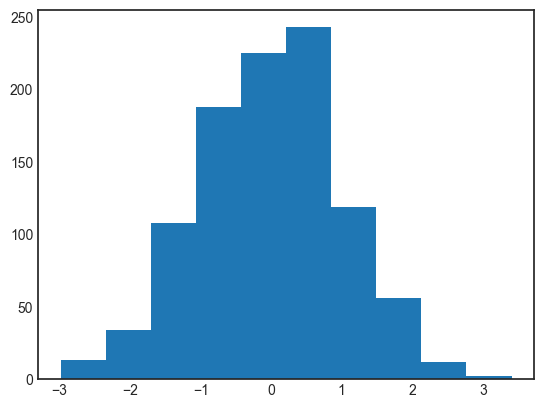

In [2]:
plt.hist(data);

La función ``hist()`` tiene muchas opciones para ajustar tanto el cálculo como la visualización;
Aquí hay un ejemplo de un histograma más personalizado:

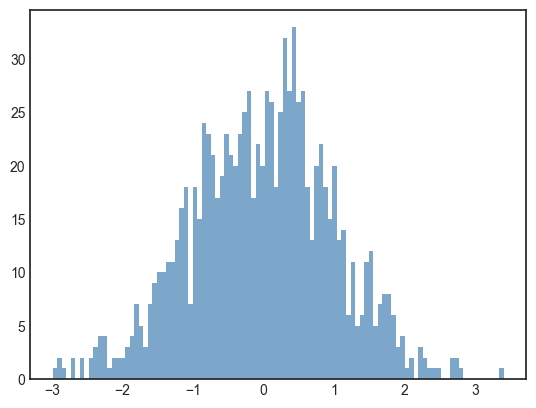

In [3]:
plt.hist(data,
         bins = 100,
        alpha = 0.7,
        color = 'steelblue');

La documentación ``plt.hist`` tiene más información sobre otras opciones de personalización disponibles.
La transparencia ``alpha`` es muy útil al comparar histogramas de varias distribuciones:

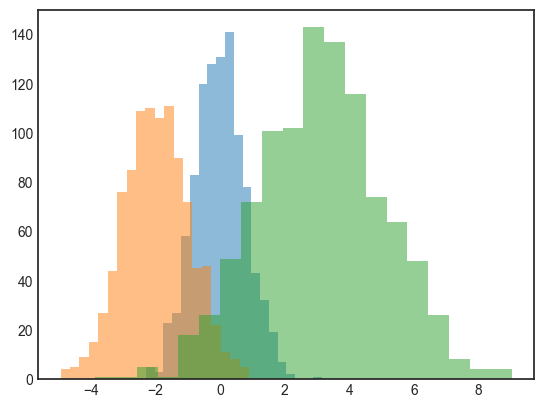

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(alpha = 0.5, bins = 20)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Si desea simplemente calcular el histograma (es decir, contar el número de puntos en una sección/bin determinada) y no mostrarlo, la función ``np.histogram()`` está disponible:

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 47 296 468 175  14]


In [6]:
bin_edges

array([-2.9858914 , -1.70711123, -0.42833106,  0.8504491 ,  2.12922927,
        3.40800944])

## Histogramas bidimensionales y binnings

Así como creamos histogramas en una dimensión dividiendo la recta numérica en secciones/bins, también podemos crear histogramas en dos dimensiones dividiendo puntos entre secciones/bins bidimensionales.
Aquí veremos brevemente varias formas de hacer esto.
Comenzaremos definiendo algunos datos: una matriz ``x`` e ``y`` extraída de una distribución gaussiana multivariada:

In [7]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: histograma bidimensional

Una forma sencilla de trazar un histograma bidimensional es utilizar la función ``plt.hist2d`` de Matplotlib:

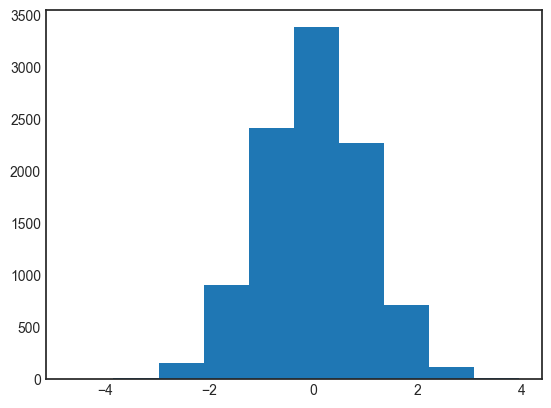

In [8]:
plt.hist(x);

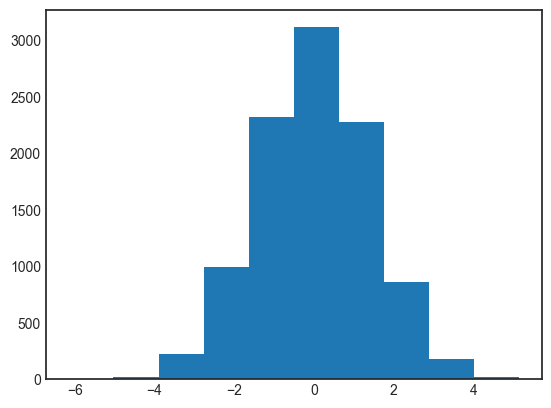

In [9]:
plt.hist(y);

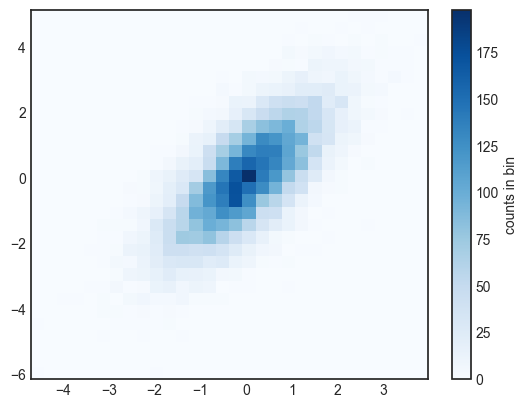

In [10]:
plt.hist2d(x, y, bins = 30, cmap = 'Blues');
cb = plt.colorbar()
cb.set_label('counts in bin');

Al igual que con ``plt.hist``, ``plt.hist2d`` tiene una serie de opciones adicionales para ajustar la gráfica y el agrupamiento, que están muy bien definidas en la documentación de la función.
Además, así como ``plt.hist`` tiene una contraparte en ``np.histogram``, ``plt.hist2d`` tiene una contraparte en ``np.histogram2d``, que puede usarse de la siguiente manera:

In [11]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

Para conocer la generalización de este histograma agrupado en dimensiones superiores a dos, consulte la función ``np.histogramdd``.

In [12]:
counts_x,edges_x=np.histogram(x,bins=10)
display(edges_x,counts_x)
counts_y,edges_y=np.histogram(y,bins=10)
display(edges_y,counts_y)

array([-4.70290485, -3.83692368, -2.9709425 , -2.10496133, -1.23898016,
       -0.37299899,  0.49298219,  1.35896336,  2.22494453,  3.09092571,
        3.95690688])

array([   3,   14,  159,  903, 2413, 3388, 2272,  717,  120,   11],
      dtype=int64)

array([-6.15937768, -5.0288812 , -3.89838471, -2.76788822, -1.63739174,
       -0.50689525,  0.62360123,  1.75409772,  2.88459421,  4.01509069,
        5.14558718])

array([   2,   23,  225,  990, 2320, 3114, 2275,  861,  175,   15],
      dtype=int64)

In [13]:
counts,xedges,yedges=np.histogram2d(x,y,bins=30)

In [14]:
display(xedges,yedges,counts)

array([-4.70290485, -4.41424446, -4.12558407, -3.83692368, -3.54826328,
       -3.25960289, -2.9709425 , -2.68228211, -2.39362172, -2.10496133,
       -1.81630094, -1.52764055, -1.23898016, -0.95031977, -0.66165938,
       -0.37299899, -0.08433859,  0.2043218 ,  0.49298219,  0.78164258,
        1.07030297,  1.35896336,  1.64762375,  1.93628414,  2.22494453,
        2.51360492,  2.80226531,  3.09092571,  3.3795861 ,  3.66824649,
        3.95690688])

array([-6.15937768, -5.78254552, -5.40571336, -5.0288812 , -4.65204903,
       -4.27521687, -3.89838471, -3.52155255, -3.14472039, -2.76788822,
       -2.39105606, -2.0142239 , -1.63739174, -1.26055958, -0.88372741,
       -0.50689525, -0.13006309,  0.24676907,  0.62360123,  1.0004334 ,
        1.37726556,  1.75409772,  2.13092988,  2.50776204,  2.88459421,
        3.26142637,  3.63825853,  4.01509069,  4.39192285,  4.76875502,
        5.14558718])

array([[  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 

### ``plt.hexbin``: secciones/bins hexagonales

El histograma bidimensional crea un mosaico de cuadrados a lo largo de los ejes.
Otra forma natural para este tipo de mosaico es el hexágono regular.
Para este propósito, Matplotlib proporciona la rutina ``plt.hexbin``, que representará un conjunto de datos bidimensional agrupado dentro de una cuadrícula de hexágonos:

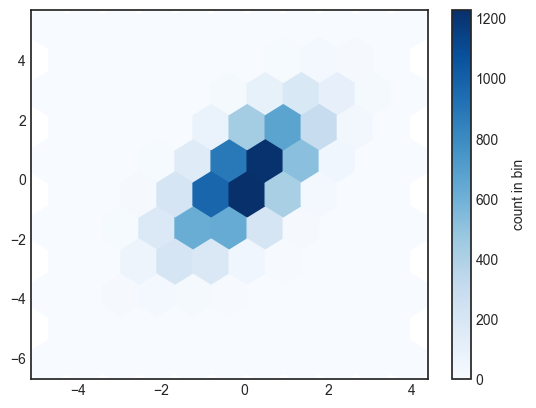

In [15]:
plt.hexbin(x, y, gridsize = 10, cmap = 'Blues')
cb = plt.colorbar(label='count in bin');

``plt.hexbin`` tiene varias opciones interesantes, incluida la capacidad de especificar pesos para cada punto y cambiar la salida en cada sección/bin a cualquier agregado NumPy (media ponderada, desviación estándar ponderada, etc.).

### Estimación de la densidad del Kernel

Otro método común para evaluar densidades en múltiples dimensiones es la *kernel density estimation* (KDE).
Esto se discutirá detalladamente, pero por ahora simplemente mencionaremos que se puede pensar en KDE como una forma de "difuminar" los puntos en el espacio y sumar los resultados para obtener una función fluida.
Existe una implementación de KDE extremadamente rápida y sencilla en el paquete ``scipy.stats``.
Aquí hay un ejemplo rápido del uso de KDE con estos datos:

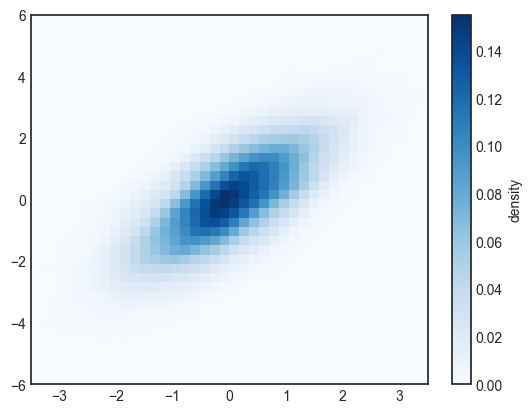

In [16]:
from scipy.stats import gaussian_kde

# Ajustar a una matriz de tamaño [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# Evaluar en una cuadrícula/malla regular
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Visualizar el resultado como una imagen
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')

cb = plt.colorbar()
cb.set_label("density")

KDE tiene una longitud de suavizado que desliza/extiende la sección/bin entre detalle y suavidad (un ejemplo del omnipresente equilibrio entre sesgo y variación).
La literatura sobre cómo elegir una longitud de suavizado adecuada es amplia: ``gaussian_kde`` utiliza una regla general para intentar encontrar una longitud de suavizado casi óptima para los datos de entrada.

Otras implementaciones de KDE están disponibles dentro del ecosistema SciPy, cada una con sus propias fortalezas y debilidades; consulte, por ejemplo, ``sklearn.neighbors.KernelDensity`` y ``statsmodels.nonparametric.kernel_density.KDEMultivariate``.
Para visualizaciones basadas en KDE, el uso de Matplotlib tiende a ser demasiado detallado.
La biblioteca Seaborn proporciona una API mucho más concisa para crear visualizaciones basadas en KDE.